# Bessel Functions
24 April 2018

Stephen Iota

## 0. Goal

Code a integrator function using Simpson's Rule, and produce plots of Bessel Functions.

Bessel functions show up all over the place in physics. The Bessel functions $J_m(x)$ are defined by

$\displaystyle J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x \sin \theta) \, d\theta\ ,$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

## 1. Simpson's Rule Integrator 

The integrator should take the following arguments:
* A function, $f$
* Two real numbers giving the limits of integration, $a$ and $b$
* The number of steps $N$ to sample

### 1.a) Write up `integrate_simpson`

In [5]:
def integrate_simpson(function_name, lower_limit, upper_limit, Nsteps):
    """
    Returns the integral using Simpson's rule
    """
    answer = 0.
    dx = (upper_limit - lower_limit) / Nsteps
    
    ### for boundary terms
    answer += function_name(lower_limit) + function_name(upper_limit)
    
    ### for even terms
    current_x = lower_limit + 2*dx
    while current_x < upper_limit:
        answer += 2*function_name(current_x)
        current_x += 2*dx
        
    ### for odd terms
    current_x = lower_limit + dx
    while current_x < upper_limit:
        answer += 4*function_name(current_x)
        current_x += 2*dx
        
    ### to finalize answer    
    answer = (1/3)*dx*answer
    
    return answer

### 1.b Testing function

In [6]:
def testfun(x):
    return 3*x**2

integrate_simpson(testfun, 0, 1, 10)

1.0

**What answer do we expect** from `integrate_simpson(testfun, 0, 1, 100)`?

A number very close to **1**

In [7]:
print("answer should be close to 1: %s" % integrate_simpson(testfun, 0 , 1, 100))

answer should be close to 1: 1.0000000000000007


## 2. A Bessel Function
[Adapted from Exercise 5.4 from *Computational Physics* by Newman]

### Discussion

Bessel functions show up all over the place in physics. The Bessel functions $J_m(x)$ are defined by

$\displaystyle J_m(x) = \frac{1}{\pi}\int_0^\pi \cos(m\theta - x \sin \theta) \, d\theta\ ,$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

### 2.a) Code the Bessel Function

In [10]:
from math import pi as pi
from math import sin as sin
from math import cos as cos

def J(m,x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """
    def integrand(theta):
        return (1/pi)*cos(m*theta - x*sin(theta))
    
    return integrate_simpson(integrand,0,pi,1000)

In [11]:
print(J(2,5))

0.04656511627775981


### 2.b) Test your Bessel Function

Test Bessel function in the following cell: 

In [12]:
print(J(1,1))

0.44005058574492467


The correct answer is $J_1(1)=0.440051$ per Mathematica.

### 2.c) Plot the Bessel Function

In this problem we'll use Numpy to **vectorize** our Bessel function so that we can feed it a Numpy array of $x$-values and output a Numpy array of $y$-values. You can read more about vectorizing [here](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.vectorize.html).

For our purposes, it may be useful to just demonstrate an example. Run the following cell.

In [13]:
# EXAMPLE OF HOW TO USE VECTORIZE
import numpy as np

def my_function(x,m):
    """raises x to the power m"""
    return x**m

# Now I'd like to apply this to a Numpy array.
# But this function doesn't know how to handle arrays.
# Let's vectorize it.

my_vectorized_function = np.vectorize(my_function)

# Here's how we can use this:
x = np.linspace(1,4,4)

print("x is an array:")
print(x)
print("")

print("check these out:")             ## why do these both print out the same thing?
print(my_vectorized_function(x,4))    
print(my_function(x,4))
#print(my_function(x,1))   ##in the original code, the non vectorized functions
#print(my_function(x,2))   ##were printied out
#print(my_function(x,3))   ##this did not affect the output though
#print(my_function(x,4))

x is an array:
[1. 2. 3. 4.]

check these out:
[  1.  16.  81. 256.]
[  1.  16.  81. 256.]


#### 2.c) note
Seems that python does not require a vectorized function in order to input an array  - Stephen

Observe that `np.vectorize` takes a function and outputs another function that can take arrays. There's something even more powerful here: `my_function` takes in *two* arguments. `np.vectorize(my_function)` accepts arrays in both. This means that we can use the following construction. Suppose `x` is a list of sample points for a function $f(a,x)$. Then to get a list of `y` values for a given value of $a$:

```python

# Where f is a function that takes two variables, f(index, x)
f_vec = np.vectorize(f)

x = np.linspace(min_value, max_value, length_of_array)
a = 1

y = f_vec(a, x)
```

Now `x` and `y` can be used to make a plot.

Now, lets produce plots of $J_0(x)$, $J_1(x)$ and $J_2(x)$ in matplotlib.

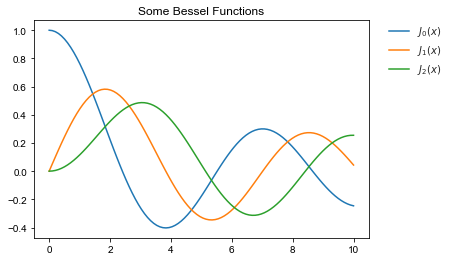

In [14]:
###########
def J(m,x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using an integral representation with Simpson's rule and 1000 steps
    """
    def integrand(theta):
        return (1/pi)*cos(m*theta - x*sin(theta))
    
    return integrate_simpson(integrand,0,pi,1000)
############## c&p for readability

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# x sample points
x = np.linspace(0,10,100)

# vectorize the J function
J_numpy = np.vectorize(J)

y0, y1, y2 = J_numpy(0,x), J_numpy(1,x), J_numpy(2,x)   #y-values of J0(x), J1(x), J2(x)

plt.plot(x,y0,label='$J_0(x)$')
plt.plot(x,y1,label='$J_1(x)$')
plt.plot(x,y2,label='$J_2(x)$')

sns.set_style("darkgrid")
sns.set_palette("coolwarm")
plt.title("Some Bessel Functions")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [15]:
print (J(1.1111343,1.432543))

0.4688906050435493
